In [11]:
import dicom
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from skimage import draw

from src import preprocess

%matplotlib inline
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_dir = '/workdir/hassony/data'
train_dir = data_dir + '/Training'
file_struct = os.walk(train_dir)
directories = []
files = []
for directory in file_struct:
    directories.append(directory[0])
    files.append(directory[2])

# directories contains a list of the patient directories
directories = directories[1:]
# files is a list of lists of all the files in the patient directories
files = files[1:]

print('{nb_patient} patients in total'.format(nb_patient=len(files)))

150 patients in total


In [16]:
roi_contour_tag = (0x3006, 0x0039)
contour_sequence_tag = (0x3006, 0x0040)
image_info_tag = (0x3006, 0x0016)
pos_case = preprocess.get_case_index(train_dir, directories, 2)

segment_dicom_ = dicom.read_file(directories[pos_case] + '/str.dcm' )
segment_dicom_[roi_contour_tag][0][contour_sequence_tag][0][image_info_tag]
segment_dicom_[roi_contour_tag][0]

tumor_index = preprocess.get_tumor_index(segment_dicom_)
print(tumor_index)

0


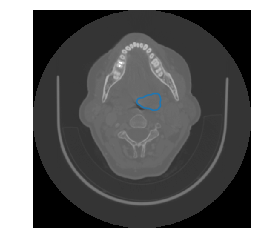

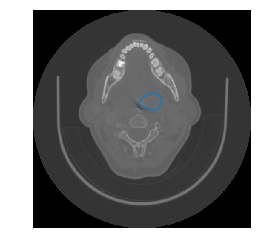

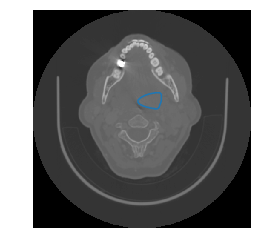

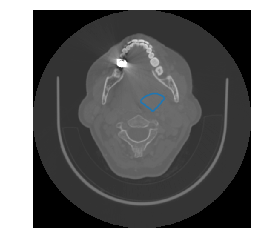

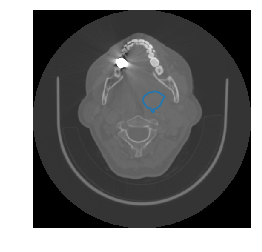

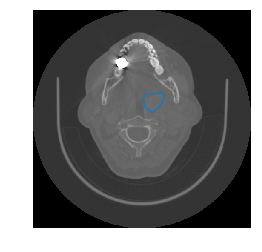

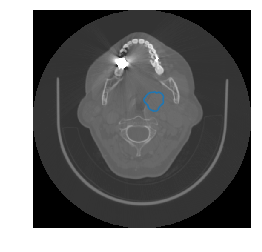

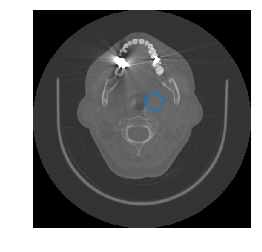

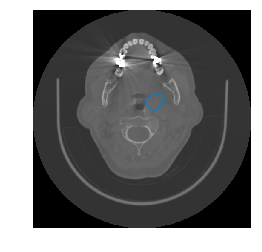

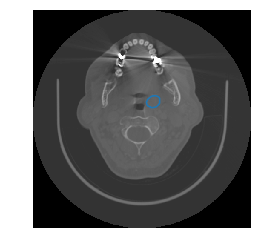

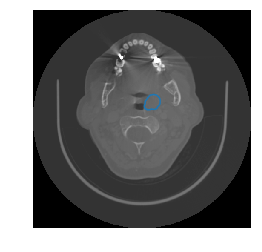

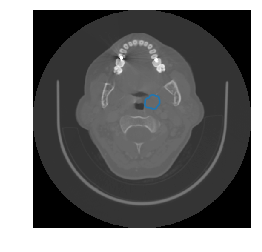

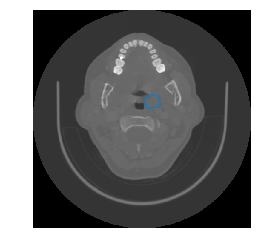

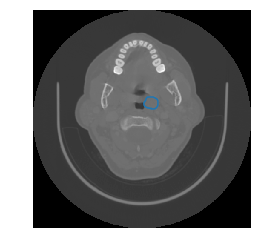

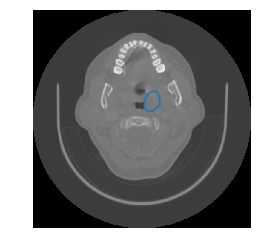

Extracted 4681 patches !


In [27]:
all_patches = preprocess.extract_all_patient_patches(train_dir  + '/Case_5', 15, display=True)
print('Extracted {nb_patches} patches !'.format(nb_patches=len(all_patches)))

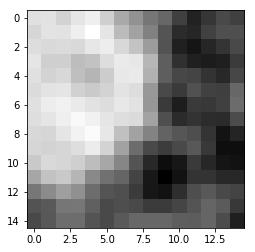

5184


In [19]:
plt.imshow(all_patches[5], cmap="gray")
plt.show()
print(len(all_patches))

In [22]:
patch_size = 25
patches_dic = preprocess.extract_all_patches(train_dir, patch_size)

In [28]:
print('{nb_patients} had at least one patch of size {patch_size}'.format(nb_patients=len(patient_patches), patch_size=patch_size))
nbs_patch = []
for patient in patient_patches:
    nbs_patch.append(len(patient_patches[patient]))
    
print('{nb_patch} patches were extracted in total'.format(nb_patch=np.sum(nbs_patch)))

In [29]:
print('min number of patches for a patient : {0}'.format(np.min(nbs_patch)))
print('max number of patches for a patient : {0}'.format(np.max(nbs_patch)))
print('median number of patches for a patient : {0}'.format(np.median(nbs_patch)))

min number of patches for a patient : 0
max number of patches for a patient : 91107
median number of patches for a patient : 390.0


In [31]:
print(len(nbs_patch))

97


In [ ]:
patch_sizes = [15, 20, 25, 30, 35]
nb_patients = []
nb_patches = []
for patch_size in patch_sizes:
    patient_patches = preprocess.extract_all_patches(train_dir, patch_size)
    patient_patches = {patient:patches for patient, patches in patient_patches.items() if (len(patches)>0)}
    print('{nb_patients} had at least one patch of size {patch_size}'.format(nb_patients=len(patient_patches), patch_size=patch_size))
    nb_patients.append(len(patient_patches))
    nbs_patch = []
    for patient in patient_patches:
        nbs_patch.append(len(patient_patches[patient]))

    print('{nb_patch} patches were extracted in total'.format(nb_patch=np.sum(nbs_patch)))
    nb_patches.append(np.sum(nbs_patch))

96 had at least one patch of size 15
1924532 patches were extracted in total


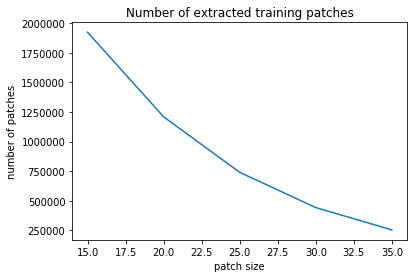

In [37]:
plt.plot(patch_sizes, nb_patches)
plt.title('Number of extracted training patches')
plt.xlabel('patch size')
plt.ylabel('number of patches')
plt.show()

{1: [], 2: array([[[ 1135.,  1142.,  1156., ...,  1084.,  1080.,  1088.],
         [ 1130.,  1149.,  1166., ...,  1089.,  1085.,  1093.],
         [ 1131.,  1146.,  1161., ...,  1092.,  1087.,  1096.],
         ..., 
         [ 1145.,  1152.,  1156., ...,  1078.,  1086.,  1095.],
         [ 1134.,  1137.,  1145., ...,  1083.,  1090.,  1098.],
         [ 1131.,  1127.,  1135., ...,  1087.,  1093.,  1103.]],
 
        [[ 1138.,  1128.,  1128., ...,  1071.,  1078.,  1080.],
         [ 1130.,  1128.,  1126., ...,  1081.,  1088.,  1094.],
         [ 1120.,  1121.,  1118., ...,  1092.,  1095.,  1095.],
         ..., 
         [ 1177.,  1141.,  1125., ...,  1072.,  1077.,  1080.],
         [ 1170.,  1138.,  1128., ...,  1064.,  1061.,  1068.],
         [ 1173.,  1149.,  1139., ...,  1058.,  1048.,  1054.]],
 
        [[ 1128.,  1128.,  1131., ...,  1078.,  1080.,  1075.],
         [ 1128.,  1126.,  1120., ...,  1088.,  1094.,  1095.],
         [ 1121.,  1118.,  1106., ...,  1095.,  1095.,  11